# Experiment 6    K-Nearest Neighbor Algorithm

# Part 1 Principle Introduction

As we are going to judge what categories a sample belongs to, we can judge by the samples around him. The k samples closest to this sample in the feature space should be in the same categorie with the test sample. Supposing that most of the k samples belong to categorie A, the test sample should also belongs to categorie A.

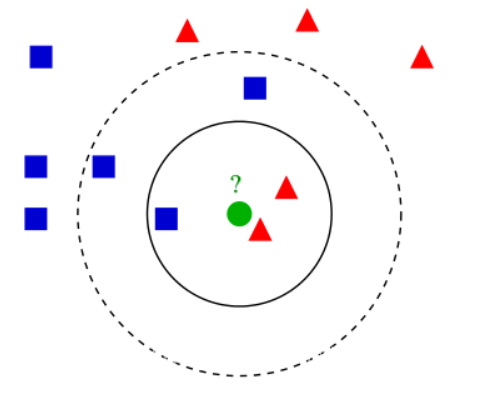

# Part 2 Code

**Note: See the file KNN.ipynb for the complete code**

## 1. Dataset

* Iris dataset: 3 class, 4 features, 150 samples.
* It is divided into three classes: Iris setosa, Iris versicolor, and Iris virginica, each class has 50 samples.
* The dataset defines five attributes: sepal length, sepal width, sepal width, petal width, class.

*The last attribute is generally used as a category attribute, and the other attributes are numerical values in centimeters.*

*For the convenience of two-dimensional display, keep the first two attributes and category attributes in the dataset for testing.*

In [ ]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim datas

X = iris.data[:, :2]
y = iris.target

*Data set display, coloring and displaying the data of the three categories*

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.show()

## 2. Train the model

**write a single class, implement a method that find the most class among the K nearest points in a class member function**

In [ ]:
class KNNClassifier():
    X=None
    y=None
    n_neighbors=0
    
    def __init__(self, n_neighbors=15):
        self.n_neighbors=n_neighbors
        
    def fit(self, X, y):
        self.X=np.array(X)
        self.y=np.array(y)

    #Find the type with the most in the nearest K points
    def predict_one(self, p):
        #Find the nearest K points
        distance_array=np.array(list(map(lambda o: math.dist(p, o), self.X)))
        argsorted=np.argsort(distance_array)
        neighbours = argsorted[:self.n_neighbors]
        #Find the most types of these k points
        neighbour_labels = y[neighbours]
        occurence_count = Counter(neighbour_labels)
        most_frequent = occurence_count.most_common(1)[0][0]
        return most_frequent
        
    def predict(self, X):
        y_hat = np.array(list(map(self.predict_one, X)))
        return y_hat

## 3. Result realization

**Generate an area, use different colors to display the predicted class results when a point in this area are in different places.**

In [ ]:
import math
from collections import Counter 
import numpy as np

n_neighbors = 10

knn = KNNClassifier(n_neighbors)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("My KNN (k = %i)"
          % (n_neighbors))

plt.show()


## 4. Model performance evaluation

**Divide iris into training set and test set randomly to test the accuracy of prediction**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=6)
knn1  = KNNClassifier(n_neighbors)
knn1.fit(x_train, y_train)
Z1 = knn.predict(x_test)
count = 0
print(Z1)
print(y_test)

for  i in range(len(Z1)):
    if Z1[i]  == y_test[i]:
        count  = count + 1
count/len(Z1)      


# Part 3 Experimental Task

**Use The KNN algorithm to solve the Helen dating problem**

 Helen has been using online dating sites to find a date that suits her. Although the sites recommend different people, she doesn't like everyone. After some summaries, she found that she had dated three types of people: people she didn't like, people with average charm, and people with great charm. Despite finding these patterns, Helen was unable to place matches suggested by dating sites into the proper categories. Helen hopes that the classification software can better help her classify matches into exact categories, and Helen has collected some data that dating sites have not recorded, which she believes can help categorize matches.
 
*Helen dating dataset (date_set.txt)*

Each data occupies one row, there are 1000 rows in total, and the first three columns are attributes.
*  Column 1: Frequent flyer miles earned per year
*  Column 2: Percentage of time spent watching videos and playing games
*  Column 3: Liters of ice cream consumed per week
*  Column 4: Category of men (1 dislike, 2 average, 3 Charming) 

Use the knn algorithm to predict the type of date you're dating. 
Tip: When using the dataset, due to the large difference in the magnitude of different features, the feature data of the dataset can be normalized.